In [1]:
import os
import glob
import time
import geopandas as gpd
# import util.database as db
from shapely import wkt
# import fiona
import subprocess
import pandas as pd
import json
import unidecode
import matplotlib.pyplot as plt

#### Functions

In [2]:
def get_shapefiles(root_dir):
    """ find all .shp files in the directory tree """

    shp_files = glob.glob(os.path.join(root_dir, '**/*.shp'), recursive=True)

    # # remove unneeded files
    # shp_files = [x for x in shp_files if "buffer" not in x]
    shp_files = [(i, x, x.split("/")[-1].split("_")[-2]) for i, x in enumerate(shp_files)]

    shp_files = sorted(shp_files, key = lambda x: x[2])

    # shp_files = sorted(shp_files)

    print(f"Number of files found: {len(shp_files)}")
    return shp_files

def get_data_valparaiso(gdf):
    
    gdf.columns = [c.lower() for c in gdf.columns]

    gdf["comuna"] = gdf["comuna"].astype('str')
    gdf["provincia"] = gdf["provincia"].astype('str')
    gdf["region"] = gdf["region"].astype('str')

    gdf["comuna"] = gdf["comuna"].apply(
        # lambda x: unidecode.unidecode(x)
        lambda x: x if not x
        else x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ")
    )
    # pd.unique(gdf["comuna"])

    gdf["provincia"] = gdf["provincia"].apply(
        # lambda x: unidecode.unidecode(x)
        lambda x: x if not x
        else x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ")
    )
    # pd.unique(gdf["provincia"])


    gdf["region"] = gdf["region"].apply(
        # lambda x: unidecode.unidecode(x)
        lambda x: x if not x
        else x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ")
    )
    print(pd.unique(gdf["region"]))

    # gdf_tmp = gdf[gdf["REGION"] == "Valparaíso"]
    gdf = gdf[
        (gdf["region"] == "Valparaíso") | 
        (gdf["region"] == "VALPARAISO") | 
        (gdf["region"] == "Región de Valparaíso") | 
        (gdf["region"] == "Region de Valparaiso") |
        (gdf["region"] == "R.Valparaiso")
    ]

    # gdf["id"] = gdf["id"].astype('int64')

    return gdf


#### Read Valparaiso data from shape files

In [3]:
pwd

'/home/hugosoto/Work/ine/dataton_dosafios/notebook'

In [4]:
shp_files = get_shapefiles(root_dir="/home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/")

for i, f in enumerate(shp_files):
    print(i, f[1], f[2])

Number of files found: 10
0 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2013_2014/if_magnitud_2013_2014.shp 2013
1 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2014_2015/if_magnitud_2014_2015.shp 2014
2 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2015_2016/if_magnitud_2015_2016.shp 2015
3 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2016_2017/if_magnitud_2016_2017.shp 2016
4 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2017_2018/if_magnitud_2017_2018.shp 2017
5 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2018_2019/if_magnitud_2018_2019.shp 2018
6 /home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2019_2020/if_magnitud_2019_2020.shp 2019
7

In [27]:
gdf_valpo = gpd.GeoDataFrame()

for i, shp_file in enumerate(shp_files):

    print("####################")
    print(f"Processing shape file: {shp_file}...")

    # fead the shapefile
    data_path = shp_file[1]
    gdf = gpd.read_file(data_path)

    # if i == 9:
    #     break

    gdf_tmp = get_data_valparaiso(gdf)

    gdf_valpo = pd.concat([gdf_valpo, gdf_tmp], ignore_index=True)


####################
Processing shape file: (3, '/home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2013_2014/if_magnitud_2013_2014.shp', '2013')...
['Región de La Araucanía' 'Región del Biobío'
 "Región del Libertador General Bernardo O'Higgins"
 'Región Metropolitana de Santiago'
 'Región del General Carlos IbaÃ±ez del Campo' 'Región del Maule'
 'Región de Valparaíso' 'Región de Los Lagos']
####################
Processing shape file: (0, '/home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2014_2015/if_magnitud_2014_2015.shp', '2014')...
['La Araucanía' 'Biobío' 'Maule' "O'Higgins" 'Valparaíso' 'Los Lagos'
 'Metropolitana']
####################
Processing shape file: (2, '/home/hugosoto/Work/ine/dataton_dosafios/data/shape_incendios/incendios_de_magnitud/if_magnitud_2015_2016/if_magnitud_2015_2016.shp', '2015')...
['OHIGGINS' 'VALPARAISO' 'BIOBIO' 'LA ARAUCANIA' 'MAULE' 'LOS LAGOS'
 'AYSEN' 'METR

In [28]:
gdf_valpo.shape

(61, 17)

In [31]:
gdf_valpo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
gdf_valpo = gdf_valpo.to_crs("EPSG:4326")

In [32]:
pd.unique(gdf_valpo["region"])

array(['Región de Valparaíso', 'Valparaíso', 'VALPARAISO',
       'Region de Valparaiso', 'R.Valparaiso'], dtype=object)

In [33]:
print(pd.unique(gdf_valpo["fecha_ini"]).shape)
pd.unique(gdf_valpo["fecha_ini"])

(36,)


array(['2014-01-31', '2013-12-31', '2014-01-09', '2015-03-13',
       '2014-12-22', nan, '2016-11-03', '2016-12-13', '2017-01-01',
       '2016-11-17', '2016-12-20', '2016-12-22', '2017-01-13',
       '2017-01-17', '2017-01-20', '2017-01-24', '2017-03-12',
       '2017-01-02', '2016-12-14', '2016-12-21', '2016-11-26',
       '2016-11-29', '2017-01-14', '2017-02-05', '2017-01-03',
       '2017-01-09', '2019-01-02', '2019-01-28', '2021-01-15',
       '2021-01-14', '2020-12-15', '15-dic-2022 15:17',
       '12-may-2023 15:16', '15-dic-2022 13:29', '23-dic-2022 16:35',
       '21-nov-2022 15:09'], dtype=object)

In [34]:
print(pd.unique(gdf_valpo["fecha_ter"]).shape)
pd.unique(gdf_valpo["fecha_ter"])

(30,)


array([nan, '2016-11-08', '2016-12-23', '2017-01-13', '2016-11-23',
       '2016-12-27', '2016-12-28', '2017-01-17', '2017-01-22',
       '2017-01-30', '2017-01-19', '2017-03-17', '2016-11-07',
       '2017-02-24', '2016-11-20', '2016-12-25', '2016-11-30',
       '2016-12-02', '2017-01-21', '2017-02-07', '2017-01-09',
       '2017-01-14', '2021-01-17', '2021-01-23', '2020-12-23',
       '26-dic-2022 15:39', '20-may-2023 18:21', '21-dic-2022 18:43',
       '27-dic-2022 19:56', '25-nov-2022 20:28'], dtype=object)

In [35]:
gdf_valpo

,id,temporada,nom_incen,causa,superficie,codreg,codprov,codcom,region,comuna,provincia,fecha_ini,fecha_ter,shape_leng,shape_area,geometry,numero_reg
0,12.0,2013-2014,Via Amaral - San Antonio,Incendio Intencional,616.700000,05,NaN,NaN,Región de Valparaíso,nan,nan,2014-01-31,NaN,34869.957359,6.166685e+06,"POLYGON ((-71.51081 -33.76011, -71.51051 -33.7...",NaN
1,19.0,2013-2014,Quebrada Escobar - Villa Alemana,Uso de fuego por transeÃºntes,999.400000,05,NaN,NaN,Región de Valparaíso,nan,nan,2013-12-31,NaN,37379.431160,9.994173e+06,"POLYGON ((-71.29165 -33.08819, -71.29139 -33.0...",NaN
2,21.0,2013-2014,Curva de la Muerte-Cartagena,Uso de fuego por transeÃºntes,234.600000,05,NaN,NaN,Región de Valparaíso,nan,nan,2014-01-09,NaN,17302.492920,2.346025e+06,"POLYGON ((-71.55152 -33.55432, -71.55152 -33.5...",NaN
3,53.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,297.100000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,13712.457198,2.970871e+06,"POLYGON ((-71.56923 -33.07419, -71.56921 -33.0...",NaN
4,54.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,2.300000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,1526.254250,2.254950e+04,"POLYGON ((-71.56577 -33.06623, -71.56576 -33.0...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,2022-2023,CERRO VIEJO,2.1.11. Otros intencionales no clasificados,1252.757398,5,58,5801,Valparaíso,Quilpue,Marga Marga,15-dic-2022 15:17,26-dic-2022 15:39,NaN,NaN,"POLYGON Z ((-71.11280 -33.18740 0.00000, -71.1...",159.0
57,NaN,2022-2023,LA HIGUERA,1.9.3. Corte de cable por caida de tendido elc...,287.414597,5,54,5405,Valparaíso,Zapallar,Petorca,12-may-2023 15:16,20-may-2023 18:21,NaN,NaN,"MULTIPOLYGON Z (((-71.43982 -32.53657 0.00000,...",397.0
58,NaN,2022-2023,QUEBRADA ESCOBAR,2.1.11. Otros intencionales no clasificados,736.831978,5,58,5804,Valparaíso,Villa Alemana,Marga Marga,15-dic-2022 13:29,21-dic-2022 18:43,NaN,NaN,"MULTIPOLYGON Z (((-71.28545 -33.03525 0.00000,...",157.0
59,NaN,2022-2023,HACIENDA SAN ENRIQUE,1.8.1. Quema de basuras desechos vegetales u ...,563.156816,5,56,5606,Valparaíso,Santo Domingo,San Antonio,23-dic-2022 16:35,27-dic-2022 19:56,NaN,NaN,"MULTIPOLYGON Z (((-71.65776 -33.88806 0.00000,...",179.0


<Axes: >

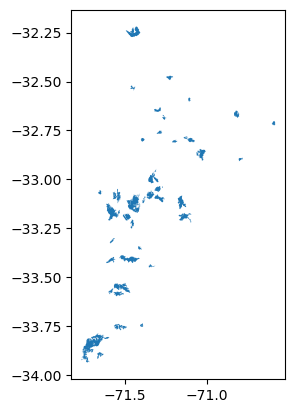

In [36]:
gdf_valpo.plot()

#### Selected shapes from Valparaiso

In [37]:
gdf_valpo.loc[0,"temporada"]

'2013-2014'

In [38]:
dct_selected_shapes_nom_incendio = {
    "2014-2015": ["Curva El Parque"],
    "2016-2017": ["803_RUTA LAS PALMAS"],
    "2019-2020": ["247 - TRANQUE EL PERAL"],
    "2021-2022": ["350-LOMA NEGRA 3"],
}
dct_selected_shapes_nom_incendio

{'2014-2015': ['Curva El Parque'],
 '2016-2017': ['803_RUTA LAS PALMAS'],
 '2019-2020': ['247 - TRANQUE EL PERAL'],
 '2021-2022': ['350-LOMA NEGRA 3']}

In [39]:
gdf_selected = gpd.GeoDataFrame()

for k, v in dct_selected_shapes_nom_incendio.items():
    print(k, v)
    for nom_incen in v:
        gdf_tmp = gdf_valpo[
            (gdf_valpo["temporada"] == k) &
            (gdf_valpo["nom_incen"] == nom_incen)        
        ]
        # print(gdf_tmp)
        if len(gdf_tmp) > 0:
            gdf_selected = pd.concat([gdf_selected, gdf_tmp], ignore_index=True)

2014-2015 ['Curva El Parque']
2016-2017 ['803_RUTA LAS PALMAS']
2019-2020 ['247 - TRANQUE EL PERAL']
2021-2022 ['350-LOMA NEGRA 3']


In [40]:
gdf_selected

,id,temporada,nom_incen,causa,superficie,codreg,codprov,codcom,region,comuna,provincia,fecha_ini,fecha_ter,shape_leng,shape_area,geometry,numero_reg
0,53.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,297.100000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,13712.457198,2.970871e+06,"POLYGON ((-71.56923 -33.07419, -71.56921 -33.0...",NaN
1,54.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,2.300000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,1526.254250,2.254950e+04,"POLYGON ((-71.56577 -33.06623, -71.56576 -33.0...",NaN
2,55.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,265.000000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,21077.746702,2.650162e+06,"POLYGON ((-71.55893 -33.06362, -71.55885 -33.0...",NaN
3,104.0,2016-2017,803_RUTA LAS PALMAS,2.1.11. Otros intencionales no clasificados,450.000000,05,051,05101,Región de Valparaíso,Valparaíso,Valparaíso,2017-03-12,2017-03-17,34837.625842,4.438677e+06,"POLYGON ((-71.54297 -33.08747, -71.54293 -33.0...",NaN
4,5.0,2019-2020,247 - TRANQUE EL PERAL,4.1.2. No determinada (la causa no es investig...,500.757398,05,051,05101,Valparaíso,Valparaíso,Valparaíso,NaN,NaN,37648.847444,5.007574e+06,"MULTIPOLYGON (((-71.54273 -33.12005, -71.54270...",NaN


In [41]:
gdf_selected.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
gdf_selected["area_km2"] = gdf_selected.geometry.area * 1/(1000*1000) # [km2]
gdf_selected

/tmp/ipykernel_31670/136883500.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_selected["area_km2"] = gdf_selected.geometry.area * 1/(1000*1000) # [km2]


,id,temporada,nom_incen,causa,superficie,codreg,codprov,codcom,region,comuna,provincia,fecha_ini,fecha_ter,shape_leng,shape_area,geometry,numero_reg,area_km2
0,53.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,297.100000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,13712.457198,2.970871e+06,"POLYGON ((-71.56923 -33.07419, -71.56921 -33.0...",NaN,2.867573e-10
1,54.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,2.300000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,1526.254250,2.254950e+04,"POLYGON ((-71.56577 -33.06623, -71.56576 -33.0...",NaN,2.175975e-12
2,55.0,2014-2015,Curva El Parque,1.8.1. Quema de basuras desechos vegetales u ...,265.000000,05,051,05101,Valparaíso,Valparaíso,Valparaíso,2015-03-13,NaN,21077.746702,2.650162e+06,"POLYGON ((-71.55893 -33.06362, -71.55885 -33.0...",NaN,2.557633e-10
3,104.0,2016-2017,803_RUTA LAS PALMAS,2.1.11. Otros intencionales no clasificados,450.000000,05,051,05101,Región de Valparaíso,Valparaíso,Valparaíso,2017-03-12,2017-03-17,34837.625842,4.438677e+06,"POLYGON ((-71.54297 -33.08747, -71.54293 -33.0...",NaN,4.283609e-10
4,5.0,2019-2020,247 - TRANQUE EL PERAL,4.1.2. No determinada (la causa no es investig...,500.757398,05,051,05101,Valparaíso,Valparaíso,Valparaíso,NaN,NaN,37648.847444,5.007574e+06,"MULTIPOLYGON (((-71.54273 -33.12005, -71.54270...",NaN,4.833964e-10


#### Shape boundaries

In [43]:
# shape boundaries
gdf_selected_boundary = gdf_selected.copy()
gdf_selected_boundary["geometry"] = gdf_selected_boundary["geometry"].apply(
    lambda x: x.boundary
)


/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [44]:
g = gdf_selected.loc[0,"geometry"]
print(type(g))
g.boundary
print(type(g))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


#### Shape: common boundary

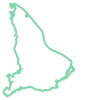

In [45]:
g = gdf_selected.loc[0,"geometry"]
g.boundary
# g.boundary.buffer(.00015, join_style=2).unary_union.buffer(-.00015, join_style=2)

In [46]:
# gdf_selected_common = gpd.GeoSeries(gdf_selected.geometry.buffer(.00015, join_style=2).unary_union.buffer(-.00015, join_style=2))
gdf_selected_common_series = gpd.GeoSeries(gdf_selected.geometry.buffer(.00015, join_style=2).unary_union.buffer(-.00015, join_style=2))
gdf_selected_common = gpd.GeoDataFrame(gdf_selected_common_series)

gdf_selected_common.columns = ['geometry']
# gdf_selected_common = gdf_selected_common.reset_index()

print(type(gdf_selected_common))
print(gdf_selected_common.dtypes)

gdf_selected_common = gdf_selected_common.set_geometry("geometry")
gdf_selected_common = gdf_selected_common.set_crs(gdf_selected.crs)

gdf_selected_common

<class 'geopandas.geodataframe.GeoDataFrame'>
geometry    geometry
dtype: object


/tmp/ipykernel_31670/926118511.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_selected_common_series = gpd.GeoSeries(gdf_selected.geometry.buffer(.00015, join_style=2).unary_union.buffer(-.00015, join_style=2))


,geometry
0,"MULTIPOLYGON (((-71.52499 -33.09116, -71.52498..."


In [47]:
gdf_selected_common.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
gdf_selected_common_boundary = gdf_selected_common.copy()

gdf_selected_common_boundary["geometry"] = gdf_selected_common_boundary["geometry"].apply(
    lambda x: x.boundary
)

gdf_selected_common_boundary

/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,geometry
0,"MULTILINESTRING ((-71.52499 -33.09116, -71.524..."


#### Shape boundaries

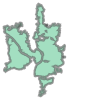

In [49]:
gdf_selected_common.loc[0,"geometry"]

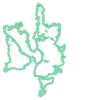

In [50]:
gdf_selected_common.loc[0,"geometry"].boundary

#### Plot shapes

/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


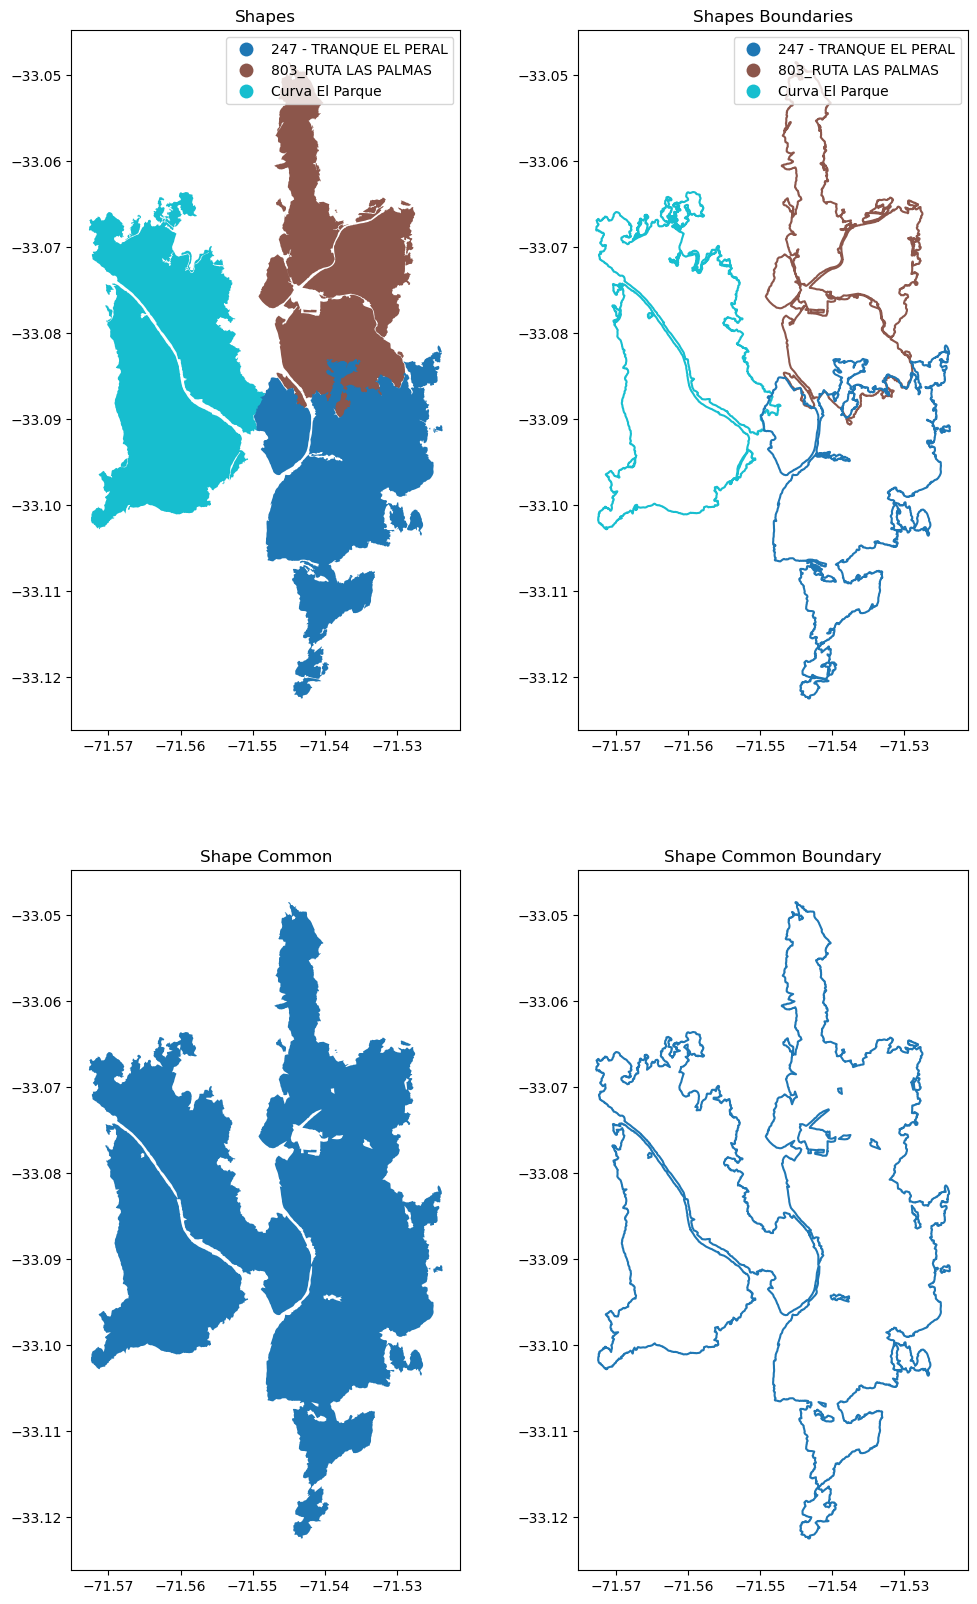

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(12, 20))
axs

# selected shapes
gdf_valpo.plot(column="nom_incen", legend=True, ax=axs[0,0])
gdf_selected_boundary.plot(column="nom_incen", legend=True, ax=axs[0,1])

# common shape
gdf_selected_common.plot(ax=axs[1,0])
gdf_selected_common_boundary.plot(ax=axs[1,1])

axs[0,0].set_title("Shapes")
axs[0,1].set_title("Shapes Boundaries")
axs[1,0].set_title("Shape Common")
axs[1,1].set_title("Shape Common Boundary")

fig.savefig("/home/hugosoto/Work/ine/dataton_dosafios/notebook/out/valparaiso_selected_shape.png",bbox_inches='tight')

/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/hugosoto/anaconda3/envs/ml/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


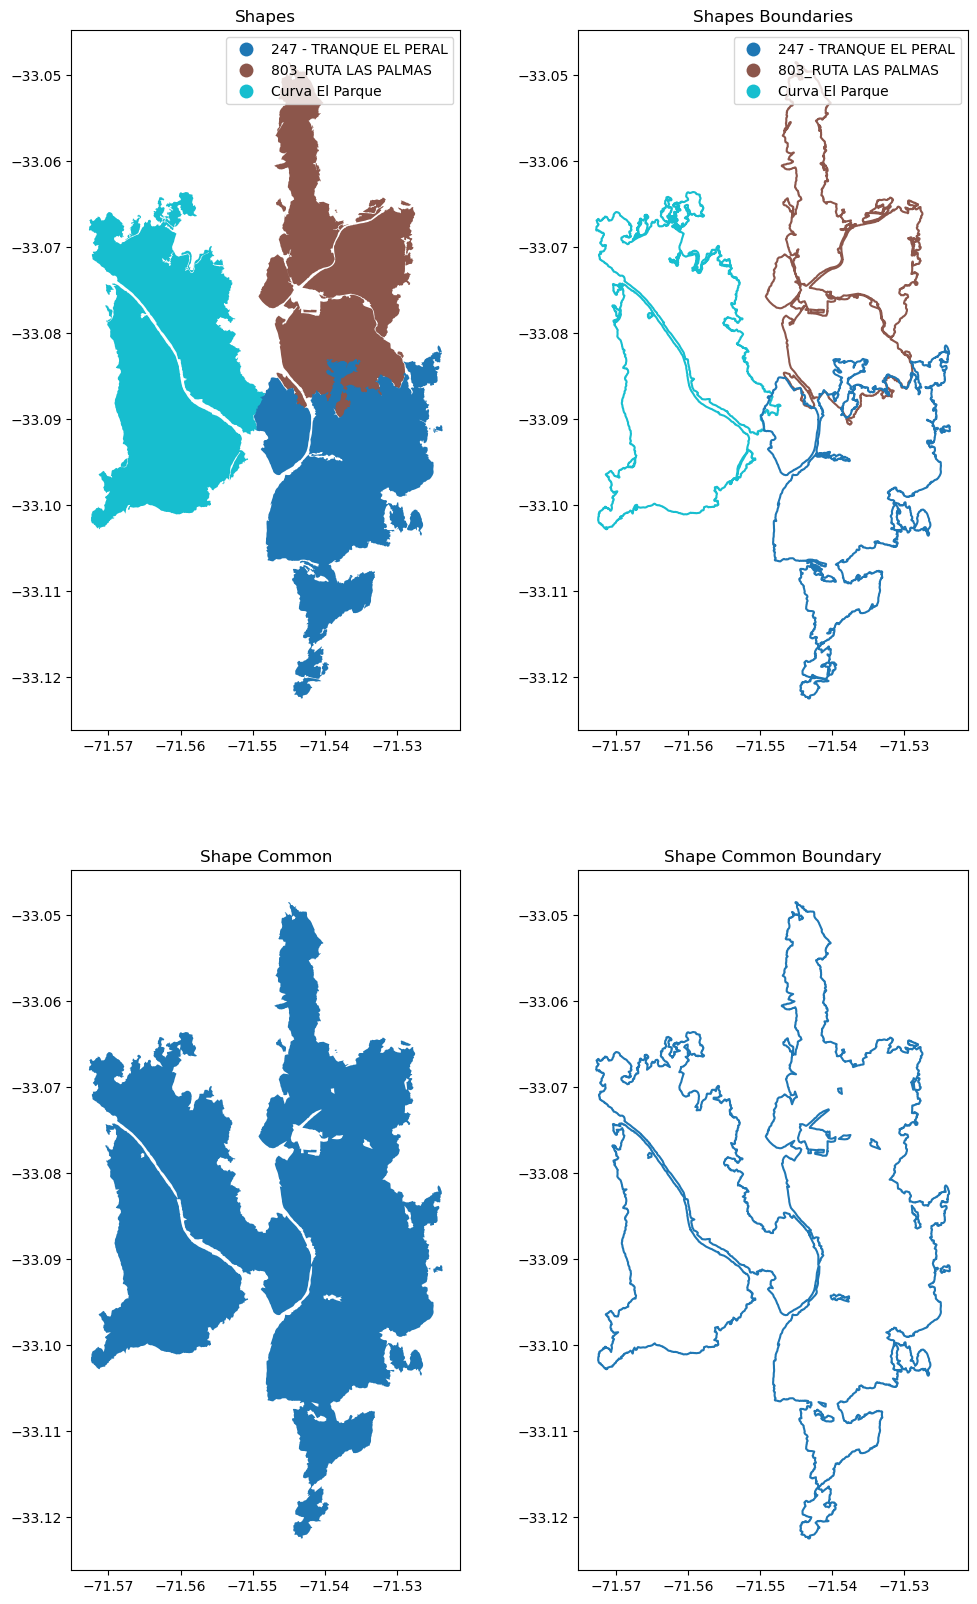

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 20))
axs

# selected shapes
gdf_selected.plot(column="nom_incen", legend=True, ax=axs[0,0])
gdf_selected_boundary.plot(column="nom_incen", legend=True, ax=axs[0,1])

# common shape
gdf_selected_common.plot(ax=axs[1,0])
gdf_selected_common_boundary.plot(ax=axs[1,1])

axs[0,0].set_title("Shapes")
axs[0,1].set_title("Shapes Boundaries")
axs[1,0].set_title("Shape Common")
axs[1,1].set_title("Shape Common Boundary")

fig.savefig("/home/hugosoto/Work/ine/dataton_dosafios/notebook/out/valparaiso_selected_shape.png",bbox_inches='tight')

In [52]:
gdf_selected_common

,geometry
0,"MULTIPOLYGON (((-71.52499 -33.09116, -71.52498..."


#### Save shapes

In [53]:
path_shp = "/home/hugosoto/Work/ine/dataton_dosafios/notebook/out/valparaiso_selected_shape_common.shp"
gdf_selected_common.to_file(path_shp)

#### Tests

In [30]:
data_path = "/home/hugosoto/Work/ine/dataton_dosafios/shape_incendios/incendios_de_magnitud/if_magnitud_2022_2023/if_magnitud_2022_2023.shp"
gdf = gpd.read_file(data_path)
gdf

,TEMPORADA,NOM_INCEN,FECHA_INI,SUPERFICIE,PROVINCIA,COMUNA,NUMERO_REG,CAUSA,REGION,CODCOM,CODPROV,CODREG,FECHA_TER,geometry
0,2022-2023,CERRO VIEJO,15-dic-2022 15:17,1252.757398,Marga Marga,Quilpue,159.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,26-dic-2022 15:39,"POLYGON Z ((303031.358 6325948.612 0.000, 3029..."
1,2022-2023,LA HIGUERA,12-may-2023 15:16,287.414597,Petorca,Zapallar,397.0,1.9.3. Corte de cable por caida de tendido elc...,Valparaíso,5405,54,5,20-may-2023 18:21,MULTIPOLYGON Z (((270868.784 6397462.152 0.000...
2,2022-2023,QUEBRADA ESCOBAR,15-dic-2022 13:29,736.831978,Marga Marga,Villa Alemana,157.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5804,58,5,21-dic-2022 18:43,MULTIPOLYGON Z (((286564.574 6342484.058 0.000...
3,2022-2023,HACIENDA SAN ENRIQUE,23-dic-2022 16:35,563.156816,San Antonio,Santo Domingo,179.0,1.8.1. Quema de basuras desechos vegetales u ...,Valparaíso,5606,56,5,27-dic-2022 19:56,MULTIPOLYGON Z (((254206.961 6247076.128 0.000...
4,2022-2023,HACIENDA LAS PALMAS,21-nov-2022 15:09,247.770079,Marga Marga,Quilpue,84.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,25-nov-2022 20:28,MULTIPOLYGON Z (((277627.718 6332765.043 0.000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-2023,Las Toscas ñUBLE,4-feb-2023 11:50,4812.489568,Diguillin,Quillon,357.0,1.10.5. Soldadura y montaje de estructuras var...,Ñuble,16107,161,16,24-feb-2023 18:29,MULTIPOLYGON Z (((191404.230 5912243.272 0.000...
133,2022-2023,Llico,2-feb-2023 21:07,1822.232453,Arauco,Arauco,803.0,1.9.3. Corte de cable por caida de tendido ele...,Biobío,8202,82,8,1-mar-2023 10:53,"POLYGON Z ((92818.522 5878636.363 0.000, 92832..."
134,2022-2023,Trapiche Maule,2-feb-2023 16:38,3275.524956,Cauquenes,Cauquenes,591.0,4.1.2. No determinada (la causa no es investig...,Maule,7201,72,7,8-feb-2023 21:25,MULTIPOLYGON Z (((215502.937 5996503.324 0.000...
135,2022-2023,Villucura,3-feb-2023 14:35,1645.399859,Biobio,Santa Barbara,808.0,1.10.6. Otras actividades no clasificados (coc...,Biobío,8311,83,8,6-abr-2023 11:51,MULTIPOLYGON Z (((237201.022 5844084.887 0.000...


In [31]:
i, shp_file

(8,
 (8,
  '/home/hugosoto/Work/ine/dataton_dosafios/shape_incendios/incendios_de_magnitud/if_magnitud_2021_2022/if_magnitud_2021_2022.shp'))

In [32]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [81]:
gdf.columns = [c.lower() for c in gdf.columns]

In [82]:
gdf.dtypes

temporada       object
nom_incen       object
fecha_ini       object
superficie     float64
provincia       object
comuna          object
numero_reg     float64
causa           object
region          object
codcom          object
codprov         object
codreg          object
fecha_ter       object
geometry      geometry
dtype: object

In [83]:
gdf

,temporada,nom_incen,fecha_ini,superficie,provincia,comuna,numero_reg,causa,region,codcom,codprov,codreg,fecha_ter,geometry
0,2022-2023,CERRO VIEJO,15-dic-2022 15:17,1252.757398,Marga Marga,Quilpue,159.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,26-dic-2022 15:39,"POLYGON Z ((303031.358 6325948.612 0.000, 3029..."
1,2022-2023,LA HIGUERA,12-may-2023 15:16,287.414597,Petorca,Zapallar,397.0,1.9.3. Corte de cable por caida de tendido elc...,Valparaíso,5405,54,5,20-may-2023 18:21,MULTIPOLYGON Z (((270868.784 6397462.152 0.000...
2,2022-2023,QUEBRADA ESCOBAR,15-dic-2022 13:29,736.831978,Marga Marga,Villa Alemana,157.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5804,58,5,21-dic-2022 18:43,MULTIPOLYGON Z (((286564.574 6342484.058 0.000...
3,2022-2023,HACIENDA SAN ENRIQUE,23-dic-2022 16:35,563.156816,San Antonio,Santo Domingo,179.0,1.8.1. Quema de basuras desechos vegetales u ...,Valparaíso,5606,56,5,27-dic-2022 19:56,MULTIPOLYGON Z (((254206.961 6247076.128 0.000...
4,2022-2023,HACIENDA LAS PALMAS,21-nov-2022 15:09,247.770079,Marga Marga,Quilpue,84.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,25-nov-2022 20:28,MULTIPOLYGON Z (((277627.718 6332765.043 0.000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-2023,Las Toscas ñUBLE,4-feb-2023 11:50,4812.489568,Diguillin,Quillon,357.0,1.10.5. Soldadura y montaje de estructuras var...,Ñuble,16107,161,16,24-feb-2023 18:29,MULTIPOLYGON Z (((191404.230 5912243.272 0.000...
133,2022-2023,Llico,2-feb-2023 21:07,1822.232453,Arauco,Arauco,803.0,1.9.3. Corte de cable por caida de tendido ele...,Biobío,8202,82,8,1-mar-2023 10:53,"POLYGON Z ((92818.522 5878636.363 0.000, 92832..."
134,2022-2023,Trapiche Maule,2-feb-2023 16:38,3275.524956,Cauquenes,Cauquenes,591.0,4.1.2. No determinada (la causa no es investig...,Maule,7201,72,7,8-feb-2023 21:25,MULTIPOLYGON Z (((215502.937 5996503.324 0.000...
135,2022-2023,Villucura,3-feb-2023 14:35,1645.399859,Biobio,Santa Barbara,808.0,1.10.6. Otras actividades no clasificados (coc...,Biobío,8311,83,8,6-abr-2023 11:51,MULTIPOLYGON Z (((237201.022 5844084.887 0.000...


In [21]:
pd.unique(gdf["comuna"])

array(['Quilpue', 'Zapallar', 'Villa Alemana', 'Santo Domingo', 'Lolol',
       'La Estrella', 'San Fernando', 'Palmilla', 'Santa Cruz',
       'San Carlos', 'Ranquil', 'Quillon', 'Chillan Viejo', 'Coelemu',
       'Yungay', 'Pemuco', 'Ninhue', 'Quirihue', 'Portezuelo', 'Tiltil',
       'Melipilla', 'San Pedro', 'Isla de Maipo', 'Curacavi', 'Palena',
       'Corral', 'Mariquina', 'Primavera', 'Molina', 'Longavi',
       'Cauquenes', 'Arauco', 'Nacimiento', 'Tom__', 'Yumbel', 'Cabrero',
       'Alto Biobio', 'Hualqui', 'Mulchen', 'Contulmo', 'Los Angeles',
       'Alto Biob__o', 'Angol', 'Vilcun', 'Victoria', 'Collipulli',
       'Lautaro', 'Temuco', 'Teodoro Schmidt', 'Galvarino', 'Ercilla',
       'Puren', 'Traiguen', 'Los Sauces', 'Cholchol', 'Nueva Imperial',
       'Lumaco', 'Pur__n', 'Freire', 'Traigu__n', 'Santa Barbara',
       'Pumanque'], dtype=object)

In [22]:
pd.unique(gdf["provincia"])

array(['Marga Marga', 'Petorca', 'San Antonio', 'Colchagua',
       'Cardenal Caro', 'Punilla', 'Itata', 'Diguillin', 'Chacabuco',
       'Melipilla', 'Talagante', 'Palena', 'Valdivia', 'Tierra del Fuego',
       'Curico', 'Linares', 'Cauquenes', 'Arauco', 'Biobio', 'Concepcion',
       'Malleco', 'Cautin'], dtype=object)

In [23]:
pd.unique(gdf["region"])

array(['Valparaíso', "O'Higgins", 'Ñuble', 'Metropolitana', 'Los Lagos',
       'Los Ríos', 'Magallanes', 'Maule', 'Biobío', 'Araucanía'],
      dtype=object)

In [24]:
gdf["comuna"] = gdf["comuna"].apply(
    # lambda x: unidecode.unidecode(x)
    lambda x: x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ") if x
    else x
)
pd.unique(gdf["comuna"])

array(['Quilpue', 'Zapallar', 'Villa Alemana', 'Santo Domingo', 'Lolol',
       'La Estrella', 'San Fernando', 'Palmilla', 'Santa Cruz',
       'San Carlos', 'Ranquil', 'Quillon', 'Chillan Viejo', 'Coelemu',
       'Yungay', 'Pemuco', 'Ninhue', 'Quirihue', 'Portezuelo', 'Tiltil',
       'Melipilla', 'San Pedro', 'Isla de Maipo', 'Curacavi', 'Palena',
       'Corral', 'Mariquina', 'Primavera', 'Molina', 'Longavi',
       'Cauquenes', 'Arauco', 'Nacimiento', 'Tom__', 'Yumbel', 'Cabrero',
       'Alto Biobio', 'Hualqui', 'Mulchen', 'Contulmo', 'Los Angeles',
       'Alto Biob__o', 'Angol', 'Vilcun', 'Victoria', 'Collipulli',
       'Lautaro', 'Temuco', 'Teodoro Schmidt', 'Galvarino', 'Ercilla',
       'Puren', 'Traiguen', 'Los Sauces', 'Cholchol', 'Nueva Imperial',
       'Lumaco', 'Pur__n', 'Freire', 'Traigu__n', 'Santa Barbara',
       'Pumanque'], dtype=object)

In [25]:
gdf["provincia"] = gdf["provincia"].apply(
    # lambda x: unidecode.unidecode(x)
    lambda x: x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ") if x
    else x
)
pd.unique(gdf["provincia"])

array(['Marga Marga', 'Petorca', 'San Antonio', 'Colchagua',
       'Cardenal Caro', 'Punilla', 'Itata', 'Diguillin', 'Chacabuco',
       'Melipilla', 'Talagante', 'Palena', 'Valdivia', 'Tierra del Fuego',
       'Curico', 'Linares', 'Cauquenes', 'Arauco', 'Biobio', 'Concepcion',
       'Malleco', 'Cautin'], dtype=object)

In [26]:
gdf["region"] = gdf["region"].apply(
    # lambda x: unidecode.unidecode(x)
    lambda x: x.replace("Ã\x81","Á").replace("Ã¡","á").replace("Ã©","é").replace("Ã\xad","í").replace("Ã³","ó").replace("Ãº","ú").replace("Ã\x91","Ñ") if x
    else x
)
pd.unique(gdf["region"])

array(['Valparaíso', "O'Higgins", 'Ñuble', 'Metropolitana', 'Los Lagos',
       'Los Ríos', 'Magallanes', 'Maule', 'Biobío', 'Araucanía'],
      dtype=object)

In [27]:
gdf

,temporada,nom_incen,fecha_ini,superficie,provincia,comuna,numero_reg,causa,region,codcom,codprov,codreg,fecha_ter,geometry
0,2022-2023,CERRO VIEJO,15-dic-2022 15:17,1252.757398,Marga Marga,Quilpue,159.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,26-dic-2022 15:39,"POLYGON Z ((303031.358 6325948.612 0.000, 3029..."
1,2022-2023,LA HIGUERA,12-may-2023 15:16,287.414597,Petorca,Zapallar,397.0,1.9.3. Corte de cable por caida de tendido elc...,Valparaíso,5405,54,5,20-may-2023 18:21,MULTIPOLYGON Z (((270868.784 6397462.152 0.000...
2,2022-2023,QUEBRADA ESCOBAR,15-dic-2022 13:29,736.831978,Marga Marga,Villa Alemana,157.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5804,58,5,21-dic-2022 18:43,MULTIPOLYGON Z (((286564.574 6342484.058 0.000...
3,2022-2023,HACIENDA SAN ENRIQUE,23-dic-2022 16:35,563.156816,San Antonio,Santo Domingo,179.0,1.8.1. Quema de basuras desechos vegetales u ...,Valparaíso,5606,56,5,27-dic-2022 19:56,MULTIPOLYGON Z (((254206.961 6247076.128 0.000...
4,2022-2023,HACIENDA LAS PALMAS,21-nov-2022 15:09,247.770079,Marga Marga,Quilpue,84.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,25-nov-2022 20:28,MULTIPOLYGON Z (((277627.718 6332765.043 0.000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2022-2023,Las Toscas ñUBLE,4-feb-2023 11:50,4812.489568,Diguillin,Quillon,357.0,1.10.5. Soldadura y montaje de estructuras var...,Ñuble,16107,161,16,24-feb-2023 18:29,MULTIPOLYGON Z (((191404.230 5912243.272 0.000...
133,2022-2023,Llico,2-feb-2023 21:07,1822.232453,Arauco,Arauco,803.0,1.9.3. Corte de cable por caida de tendido ele...,Biobío,8202,82,8,1-mar-2023 10:53,"POLYGON Z ((92818.522 5878636.363 0.000, 92832..."
134,2022-2023,Trapiche Maule,2-feb-2023 16:38,3275.524956,Cauquenes,Cauquenes,591.0,4.1.2. No determinada (la causa no es investig...,Maule,7201,72,7,8-feb-2023 21:25,MULTIPOLYGON Z (((215502.937 5996503.324 0.000...
135,2022-2023,Villucura,3-feb-2023 14:35,1645.399859,Biobio,Santa Barbara,808.0,1.10.6. Otras actividades no clasificados (coc...,Biobío,8311,83,8,6-abr-2023 11:51,MULTIPOLYGON Z (((237201.022 5844084.887 0.000...


In [84]:
gdf_tmp = gdf[(gdf["region"] == "Valparaíso") | (gdf["region"] == "VALPARAISO")]
gdf_tmp

,temporada,nom_incen,fecha_ini,superficie,provincia,comuna,numero_reg,causa,region,codcom,codprov,codreg,fecha_ter,geometry
0,2022-2023,CERRO VIEJO,15-dic-2022 15:17,1252.757398,Marga Marga,Quilpue,159.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,26-dic-2022 15:39,"POLYGON Z ((303031.358 6325948.612 0.000, 3029..."
1,2022-2023,LA HIGUERA,12-may-2023 15:16,287.414597,Petorca,Zapallar,397.0,1.9.3. Corte de cable por caida de tendido elc...,Valparaíso,5405,54,5,20-may-2023 18:21,MULTIPOLYGON Z (((270868.784 6397462.152 0.000...
2,2022-2023,QUEBRADA ESCOBAR,15-dic-2022 13:29,736.831978,Marga Marga,Villa Alemana,157.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5804,58,5,21-dic-2022 18:43,MULTIPOLYGON Z (((286564.574 6342484.058 0.000...
3,2022-2023,HACIENDA SAN ENRIQUE,23-dic-2022 16:35,563.156816,San Antonio,Santo Domingo,179.0,1.8.1. Quema de basuras desechos vegetales u ...,Valparaíso,5606,56,5,27-dic-2022 19:56,MULTIPOLYGON Z (((254206.961 6247076.128 0.000...
4,2022-2023,HACIENDA LAS PALMAS,21-nov-2022 15:09,247.770079,Marga Marga,Quilpue,84.0,2.1.11. Otros intencionales no clasificados,Valparaíso,5801,58,5,25-nov-2022 20:28,MULTIPOLYGON Z (((277627.718 6332765.043 0.000...


In [75]:
type(gdf_tmp)

geopandas.geodataframe.GeoDataFrame

In [89]:
gdf_valpo = pd.concat([gdf, gdf_tmp], ignore_index=True)
print(gdf_valpo.shape)
print(gdf_tmp.shape)
gdf_valpo

(69, 16)
(7, 16)


,ID,TEMPORADA,NOM_INCEN,CAUSA,SUPERFICIE,CODREG,CODPROV,CODCOM,REGION,COMUNA,PROVINCIA,FECHA_INI,FECHA_TER,SHAPE_Leng,SHAPE_Area,geometry
0,1,2019-2020,121 - EL PRETIL,1.4.1. Uso de fuego para actividades recreativ...,362.565807,05,051,05101,Valparaíso,Valparaíso,Valparaíso,None,None,20484.933844,3.625658e+06,"MULTIPOLYGON (((258392.570 6331503.851, 258393..."
1,2,2019-2020,164 - MELOSILLA,2.1.11. Otros intencionales no clasificados,1048.866292,05,051,05102,Valparaíso,Casablanca,Valparaíso,None,None,51880.044814,1.048866e+07,"MULTIPOLYGON (((266259.287 6325815.076, 266263..."
2,3,2019-2020,201 - ANTENAS DE QUINTAY,2.1.11. Otros intencionales no clasificados,217.226613,05,051,05101,Valparaíso,Valparaíso,Valparaíso,None,None,24292.972625,2.172266e+06,"MULTIPOLYGON (((263298.230 6325244.982, 263298..."
3,4,2019-2020,223 - EL TOTORAL,1.4.1. Uso de fuego para actividades recreativ...,659.578521,05,056,05604,Valparaíso,El Quisco,San Antonio,None,None,33632.080289,6.595785e+06,"POLYGON ((261285.011 6301763.605, 261286.621 6..."
4,5,2019-2020,247 - TRANQUE EL PERAL,4.1.2. No determinada (la causa no es investig...,500.757398,05,051,05101,Valparaíso,Valparaíso,Valparaíso,None,None,37648.847444,5.007574e+06,"MULTIPOLYGON (((262759.662 6332526.335, 262762..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,3,2019-2020,201 - ANTENAS DE QUINTAY,2.1.11. Otros intencionales no clasificados,217.226613,05,051,05101,Valparaíso,Valparaíso,Valparaíso,None,None,24292.972625,2.172266e+06,"MULTIPOLYGON (((263298.230 6325244.982, 263298..."
65,4,2019-2020,223 - EL TOTORAL,1.4.1. Uso de fuego para actividades recreativ...,659.578521,05,056,05604,Valparaíso,El Quisco,San Antonio,None,None,33632.080289,6.595785e+06,"POLYGON ((261285.011 6301763.605, 261286.621 6..."
66,5,2019-2020,247 - TRANQUE EL PERAL,4.1.2. No determinada (la causa no es investig...,500.757398,05,051,05101,Valparaíso,Valparaíso,Valparaíso,None,None,37648.847444,5.007574e+06,"MULTIPOLYGON (((262759.662 6332526.335, 262762..."
67,6,2019-2020,593 - LAS CANALES,2.1.11. Otros intencionales no clasificados,1702.013723,05,058,05801,Valparaíso,Quilpué,Marga Marga,None,None,57361.007653,1.702014e+07,"MULTIPOLYGON (((297953.322 6330530.070, 297953..."


In [81]:
type(gdf_valpo)

geopandas.geodataframe.GeoDataFrame

In [82]:
gdf_valpo.dtypes

ID               int64
TEMPORADA       object
NOM_INCEN       object
CAUSA           object
SUPERFICIE     float64
CODREG          object
CODPROV         object
CODCOM          object
REGION          object
COMUNA          object
PROVINCIA       object
FECHA_INI       object
FECHA_TER       object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [83]:
pd.unique(gdf_valpo["TEMPORADA"])

array(['2019-2020'], dtype=object)

In [87]:
gdf_test = pd.concat([gpd.GeoDataFrame(), gdf_tmp], ignore_index=True)
gdf_test.shape

(7, 16)

In [85]:
type(gpd.GeoDataFrame())

geopandas.geodataframe.GeoDataFrame